# Importing the dependecies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df=pd.read_csv('Iris.csv')
df.drop(['Id'],inplace=True,axis=1)
print(df)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [37]:
# For prediction we are removing lets say 3 tuples from the dataset 
pred_data1=df.iloc[32]
print(pred_data1)

pred_data2=df.iloc[46]
print(pred_data2)

pred_data3=df.iloc[122]
print(pred_data3)




SepalLengthCm            5.2
SepalWidthCm             4.1
PetalLengthCm            1.5
PetalWidthCm             0.1
Species          Iris-setosa
Name: 32, dtype: object
SepalLengthCm            5.1
SepalWidthCm             3.8
PetalLengthCm            1.6
PetalWidthCm             0.2
Species          Iris-setosa
Name: 46, dtype: object
SepalLengthCm               7.7
SepalWidthCm                2.8
PetalLengthCm               6.7
PetalWidthCm                2.0
Species          Iris-virginica
Name: 122, dtype: object


In [38]:
# removing the above tuples from the dataset
df.drop([32,46,122],inplace=True)


In [39]:

df.shape

(147, 5)

In [40]:
# MAKING THE X AND Y FEATURES
x=df.drop('Species',axis=1)
y=df['Species']

In [42]:
print(x.head())
print(y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Encoded species']=le.fit_transform(y.ravel())# appending to our dataset
y=le.fit_transform(y.ravel())
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [44]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Encoded species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


From this we can see encoding as:

0== Iris-setosa
1== Iros-versicolor
2== Iris-Verginica

In [45]:
Encoded_class=pd.DataFrame({'Species':['Iris-setosa','Iris-versicolor','Iris-virginica'],'Encoded':[0,1,2]})
Encoded_class

,Species,Encoded
0,Iris-setosa,0
1,Iris-versicolor,1
2,Iris-virginica,2


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

np.random.seed(65)

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

clf =DecisionTreeClassifier(criterion='gini',min_samples_split=2)
clf.fit(xtrain,ytrain)
score=clf.score(xtest,ytest)
print(f'Model accuracy on test data={score*100:.2f}%')

Model accuracy on test data=96.67%


Metrics used for model selection
> classfication report
> confision matrix
> accuracy score

In [48]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

y_preds=clf.predict(xtest)
print(f'classisfication report:\n\n{classification_report(ytest,y_preds)}')

classisfication report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        12

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [49]:
cf_matrix=confusion_matrix(ytest,y_preds)
print(f'Confusion matrix:\n\n{cf_matrix}')

Confusion matrix:

[[10  0  0]
 [ 0  7  1]
 [ 0  0 12]]


[Text(0.5, 14.722222222222216, 'predicted label'),
 Text(45.722222222222214, 0.5, 'actual label')]

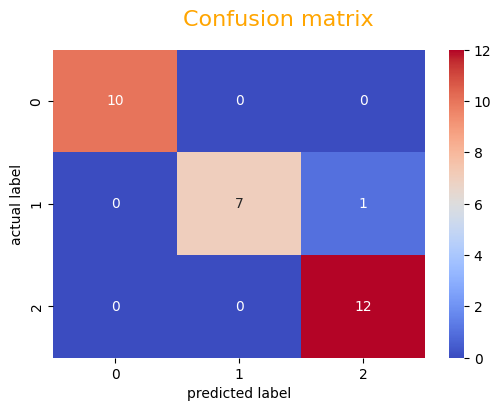

In [50]:
# Visualizing the confusion matrix
fig,ax=plt.subplots(figsize=(6,4))
sns.heatmap(cf_matrix,annot=True,cmap='coolwarm')
fig.suptitle(t='Confusion matrix',color='orange',fontsize=16)
ax.set(xlabel ='predicted label',ylabel='actual label')

In [51]:
print(f'Accuracy score:\n\n{accuracy_score(ytest,y_preds)*100:.2f}%')

Accuracy score:

96.67


In [71]:
# Visualizing our decision tree
from sklearn import tree
import matplotlib.pyplot as plt

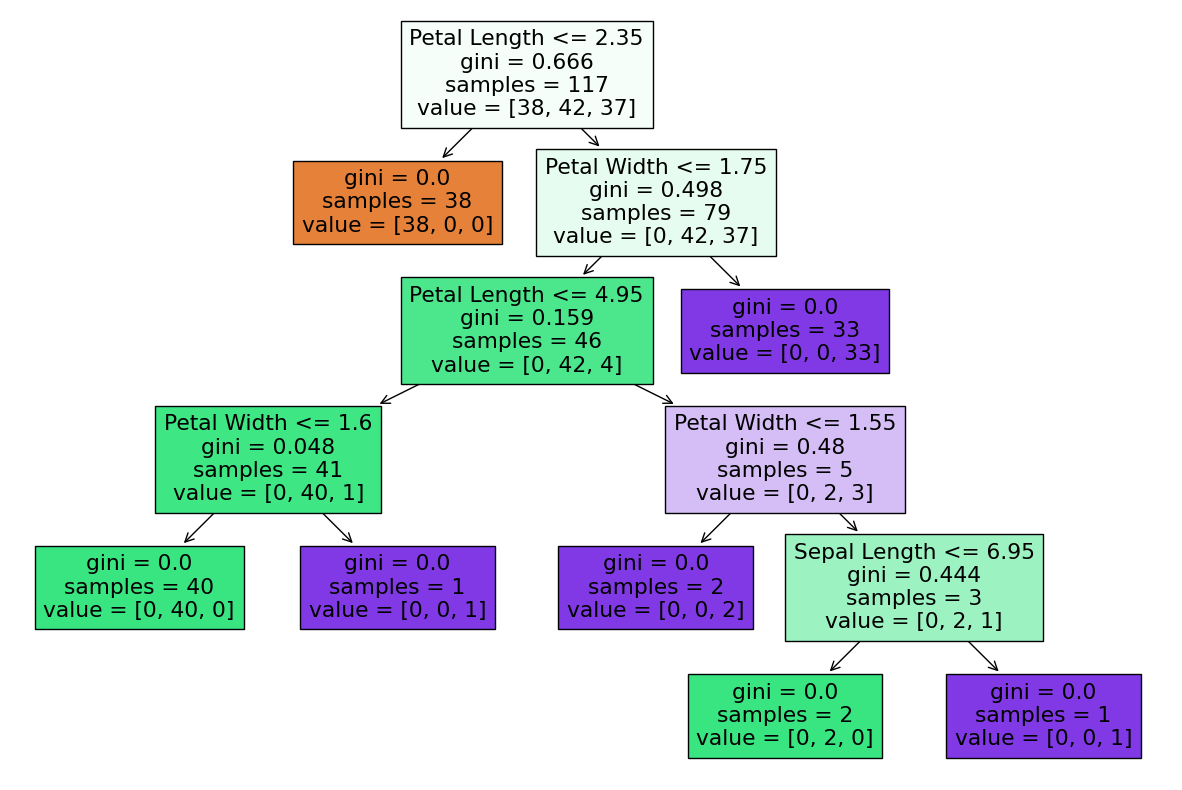

In [75]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True,feature_names=['Sepal Length','Sepal Width','Petal Length','Petal Width']);
plt.show()

>> Making prediction on unseen data

In [76]:
Encoded_class.set_index('Species')

,Encoded
Species,
Iris-setosa,0
Iris-versicolor,1
Iris-virginica,2


In [77]:
pred_data1

SepalLengthCm            5.2
SepalWidthCm             4.1
PetalLengthCm            1.5
PetalWidthCm             0.1
Species          Iris-setosa
Name: 32, dtype: object

In [78]:
# Making prediction on data 1 with species = iris -setosa

pred_x1=pd.DataFrame(np.array([5.2,4.1,1.5,0.1]).reshape(1,-1),
                     columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
pred_y1=clf.predict(pred_x1)
pred_class1=Encoded_class[Encoded_class['Encoded']==pred_y1[0]]['Species'].item()
print(f'Predicted class by model on preds_data1: {pred_class1}')

Predicted class by model on preds_data1: Iris-setosa


In [79]:
pred_data2

SepalLengthCm            5.1
SepalWidthCm             3.8
PetalLengthCm            1.6
PetalWidthCm             0.2
Species          Iris-setosa
Name: 46, dtype: object

In [80]:
# Making prediction on data 2 with species = iris -setosa

pred_x2=pd.DataFrame(np.array([5.1,3.8,1.6,0.2]).reshape(1,-1),
                     columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
pred_y2=clf.predict(pred_x2)
pred_class2=Encoded_class[Encoded_class['Encoded']==pred_y2[0]]['Species'].item()
print(f'Predicted class by model on preds_data1: {pred_class2}')

Predicted class by model on preds_data1: Iris-setosa


In [81]:
pred_data3

SepalLengthCm               7.7
SepalWidthCm                2.8
PetalLengthCm               6.7
PetalWidthCm                2.0
Species          Iris-virginica
Name: 122, dtype: object

In [82]:
# Making prediction on data 3 with species = iris -virginica

pred_x3=pd.DataFrame(np.array([7.7,2.8,6.7,2.0]).reshape(1,-1),
                     columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])
pred_y3=clf.predict(pred_x3)
pred_class3=Encoded_class[Encoded_class['Encoded']==pred_y3[0]]['Species'].item()
print(f'Predicted class by model on preds_data1: {pred_class3}')

Predicted class by model on preds_data1: Iris-virginica
